In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
crypto_df = pd.read_csv(Path('crypto_data.csv'))
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
crypto_dropped = crypto_df[(crypto_df.IsTrading != False)]
crypto_dropped

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
crypto_dropped.drop(crypto_dropped.columns[3], axis=1, inplace=True)
crypto_dropped

C:\Users\kylem\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
crypto_null = crypto_dropped.dropna()
crypto_null

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
crypto_mined = crypto_null[crypto_null.TotalCoinsMined != 0.0]
crypto_mined

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
crypto_coin = crypto_mined.drop(columns= ['CoinName',"Unnamed: 0"])
crypto_coin

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [8]:
crypto_dummies = pd.get_dummies(crypto_coin, columns=['Algorithm', 'ProofType'])
crypto_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(crypto_dummies)
crypto_scaled = scaler.transform(crypto_dummies)
print(crypto_scaled)

[[-0.11674788 -0.15286468 -0.0433555  ... -0.0433555  -0.0433555
  -0.0433555 ]
 [-0.09358885 -0.14499604 -0.0433555  ... -0.0433555  -0.0433555
  -0.0433555 ]
 [ 0.52587231  4.4937636  -0.0433555  ... -0.0433555  -0.0433555
  -0.0433555 ]
 ...
 [-0.09523411 -0.13215444 -0.0433555  ... -0.0433555  -0.0433555
  -0.0433555 ]
 [-0.11658774 -0.15255408 -0.0433555  ... -0.0433555  -0.0433555
  -0.0433555 ]
 [-0.11674507 -0.15284989 -0.0433555  ... -0.0433555  -0.0433555
  -0.0433555 ]]


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.9)

crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca

array([[-3.33758591e-01,  1.01033456e+00, -6.45813100e-01, ...,
         3.05885812e-15, -4.49804027e-16, -4.03387013e-15],
       [-3.17078307e-01,  1.01046673e+00, -6.46245153e-01, ...,
         3.19984941e-15,  3.06662881e-16, -3.78124560e-15],
       [ 2.30874144e+00,  1.63618216e+00, -7.41286519e-01, ...,
         3.67331858e-14, -8.83602143e-14,  1.01359049e-13],
       ...,
       [ 3.25544490e-01, -2.30484323e+00,  4.73020601e-01, ...,
        -2.27774085e-14,  5.68806161e-14, -3.39821410e-14],
       [-1.48615876e-01, -2.04201101e+00,  4.59154481e-01, ...,
         7.68117416e-16, -5.37255611e-15, -2.21358769e-15],
       [-2.89193559e-01,  8.11644902e-01, -3.06778334e-01, ...,
         9.03506941e-16,  2.69772911e-15,  2.08135433e-15]])

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_iter_without_progress= 300)

In [12]:
tsne_features = tsne.fit_transform(crypto_pca)

In [13]:
tsne_features.shape

(533, 2)

In [14]:
crypto = pd.DataFrame(tsne_features, columns = ['X','Y'])
crypto

,X,Y
0,1.542361,-16.565647
1,2.553424,-23.664703
2,5.305912,-30.656269
3,-38.200344,6.960430
4,3.736411,15.909601
...,...,...
528,-37.457741,5.430450
529,-0.549186,-22.286362
530,23.117907,8.830005
531,9.962345,19.280802


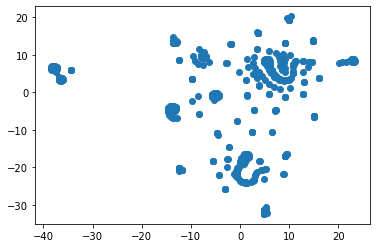

In [15]:
import matplotlib.pyplot as plt


plt.scatter(crypto['X'], crypto['Y'])
plt.show()

C:\Users\kylem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


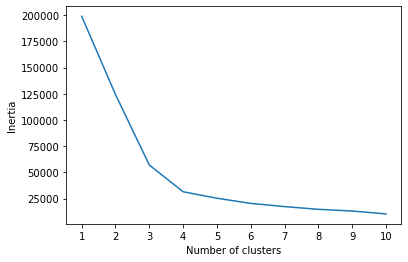

In [16]:
from sklearn.cluster import KMeans


inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [17]:
model = KMeans(n_clusters=4, random_state=5)

In [19]:
model.fit(crypto)

KMeans(n_clusters=4, random_state=5)

In [20]:
predictions = model.predict(crypto)
print(predictions)


[1 1 1 3 2 2 0 2 2 2 0 2 3 3 2 1 0 2 1 1 2 2 3 2 2 1 1 1 2 1 2 1 2 0 2 1 2
 3 2 2 2 2 0 2 2 2 2 2 2 1 0 2 0 3 2 2 2 1 2 2 0 2 3 0 1 2 3 2 1 2 1 1 1 2
 2 2 0 0 3 2 3 1 0 3 3 3 0 1 1 2 2 0 2 0 2 3 1 1 2 2 2 0 2 3 1 2 0 2 1 2 0
 2 1 1 2 2 0 2 2 2 1 2 2 2 3 2 0 1 0 2 3 1 0 0 2 2 0 2 1 2 3 1 0 3 1 2 2 3
 0 2 3 3 1 1 0 0 2 2 2 0 0 3 2 0 2 0 0 3 3 1 0 2 0 1 1 1 1 0 0 2 0 1 2 3 3
 0 1 2 1 2 0 3 2 2 1 0 1 0 2 0 1 1 0 1 2 2 0 0 2 0 1 0 0 1 1 0 0 0 3 1 0 1
 1 0 2 1 0 1 1 1 2 2 2 2 1 3 0 1 0 1 2 0 2 2 1 0 2 1 2 2 0 2 0 1 0 2 0 0 1
 0 0 1 1 1 3 0 2 0 3 0 1 1 3 2 0 2 1 2 2 2 2 1 0 1 1 2 1 2 0 0 1 2 1 2 2 1
 0 0 1 3 0 0 2 2 0 2 2 2 2 2 1 1 2 0 0 0 2 2 0 1 2 0 2 1 3 1 1 2 1 1 2 0 1
 3 0 2 2 2 0 0 1 1 2 1 2 2 2 1 1 0 2 1 1 2 0 1 0 2 1 2 2 1 1 0 0 3 1 0 2 2
 2 2 1 2 2 2 0 1 2 2 2 2 0 1 2 0 1 0 0 2 2 2 2 1 1 1 2 0 2 0 0 1 0 0 1 0 2
 2 1 1 2 0 2 0 2 2 2 2 1 0 2 1 2 1 1 2 1 3 0 2 2 0 2 1 1 0 0 1 2 1 2 2 1 2
 0 0 0 0 3 1 0 0 1 0 2 2 2 1 2 3 1 0 2 1 2 2 2 2 2 1 2 1 2 1 1 2 0 1 1 1 0
 3 1 3 0 0 1 2 0 2 1 2 1 

In [21]:
crypto["class"] = model.labels_
crypto.head()

,X,Y,class
0,1.542361,-16.565647,1
1,2.553424,-23.664703,1
2,5.305912,-30.656269,1
3,-38.200344,6.960430,3
4,3.736411,15.909601,2


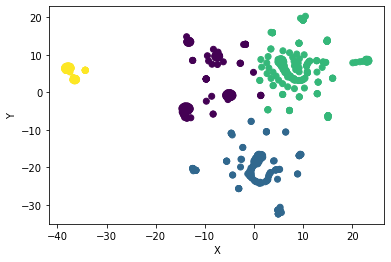

In [22]:

plt.scatter(x=crypto["X"], y=crypto['Y'], c=crypto['class'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()